In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
africa = pd.read_csv ('C:/Users/ayofa/african_crises.csv')

In [2]:
africa.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
africa.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [4]:
africa.country.value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

In [5]:
systemic_crises = africa['systemic_crisis']

In [6]:
by_country = africa.groupby('country')['systemic_crisis'].sum().to_frame(name = 'SystemicCrises').reset_index()

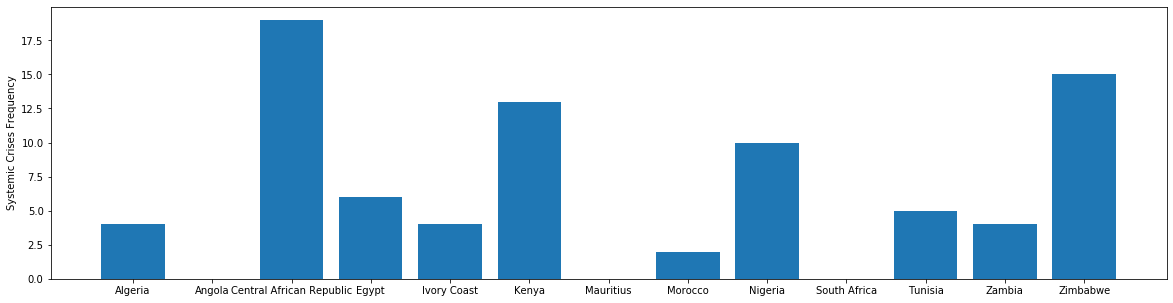

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(by_country.country, by_country.SystemicCrises)
plt.ylabel('Systemic Crises Frequency')
plt.show()

In [8]:
domestc_debt = africa['domestic_debt_in_default']

In [9]:
by_country = africa.groupby('country')['domestic_debt_in_default'].sum().to_frame(name = 'DomesticDebt').reset_index()

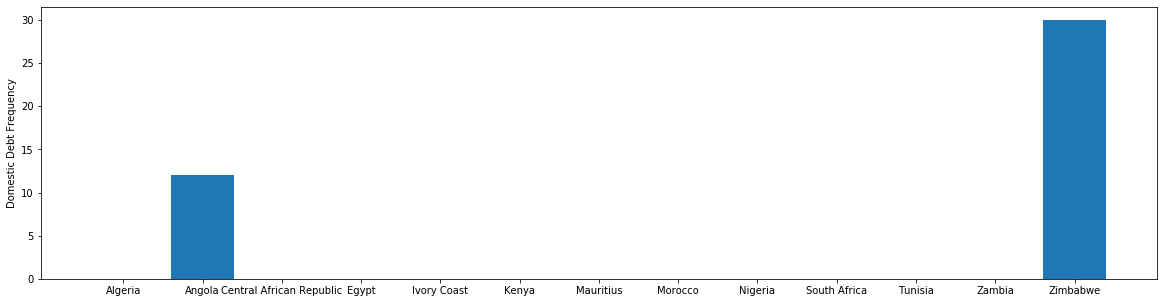

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(by_country.country, by_country.DomesticDebt)
plt.ylabel('Domestic Debt Frequency')
plt.show()

In [11]:
domestc_debt = africa['sovereign_external_debt_default']

In [12]:
by_country = africa.groupby('country')['sovereign_external_debt_default'].sum().to_frame(name = 'ExternalDebt').reset_index()

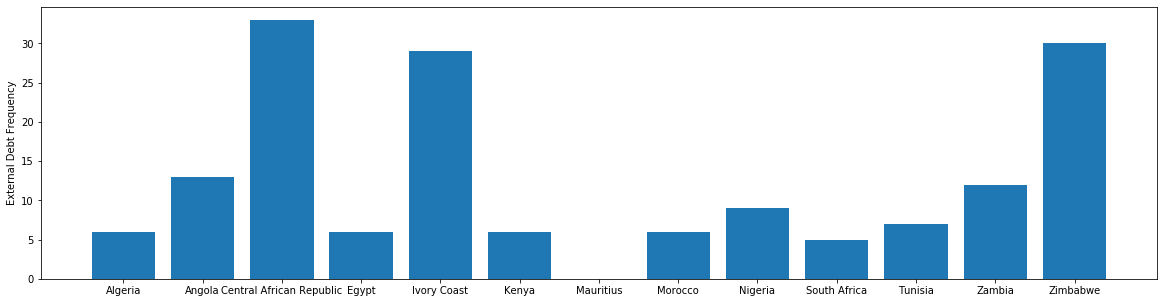

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(by_country.country, by_country.ExternalDebt)
plt.ylabel('External Debt Frequency')
plt.show()

In [14]:
exch_usd = africa['exch_usd']

In [15]:
by_country = africa.groupby('country')['exch_usd'].mean().to_frame(name = 'ExchangeUSD').reset_index()

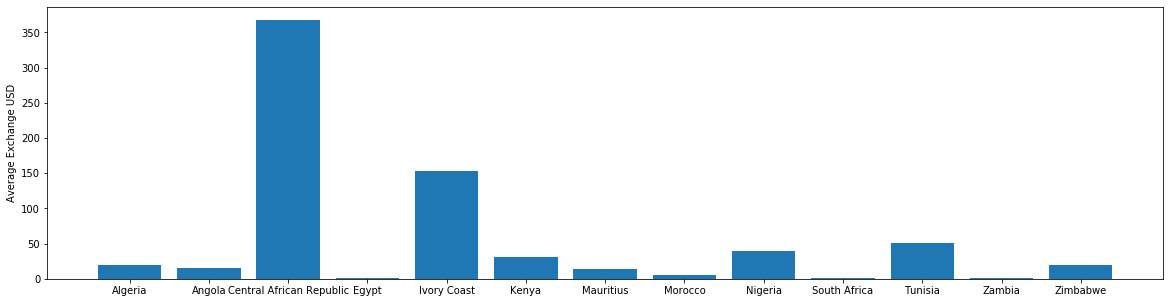

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(by_country.country, by_country.ExchangeUSD)
plt.ylabel('Average Exchange USD')
plt.show()

In [17]:
currency_crises = africa['currency_crises']

In [18]:
by_country = africa.groupby('country')['currency_crises'].sum().to_frame(name = 'Currency Crises').reset_index()

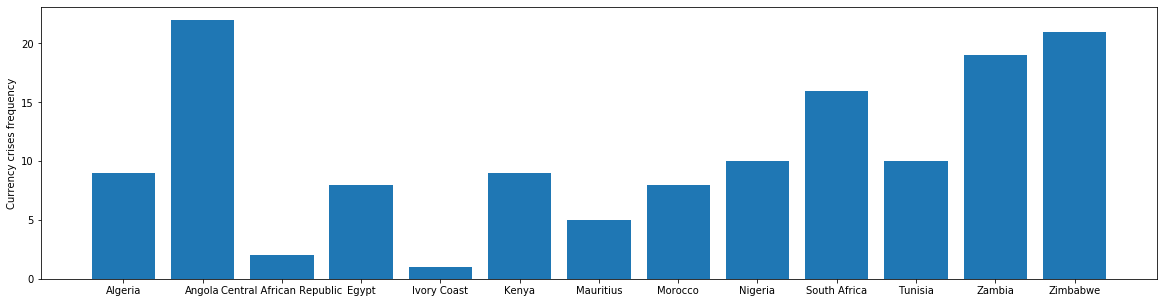

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(by_country.country, by_country['Currency Crises'])
plt.ylabel('Currency crises frequency')
plt.show()

In [20]:
inflation_crises = africa['inflation_crises']

In [21]:
by_country = africa.groupby('country')['inflation_crises'].sum().to_frame(name = 'Inflation Crises').reset_index()

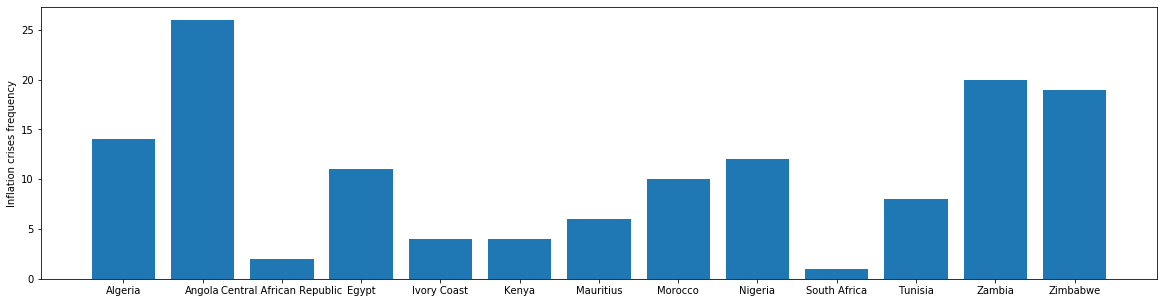

In [22]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(by_country.country, by_country['Inflation Crises'])
plt.ylabel('Inflation crises frequency')
plt.show()

In [23]:
countries = africa['country']

In [24]:
banking_crises = africa['banking_crisis']

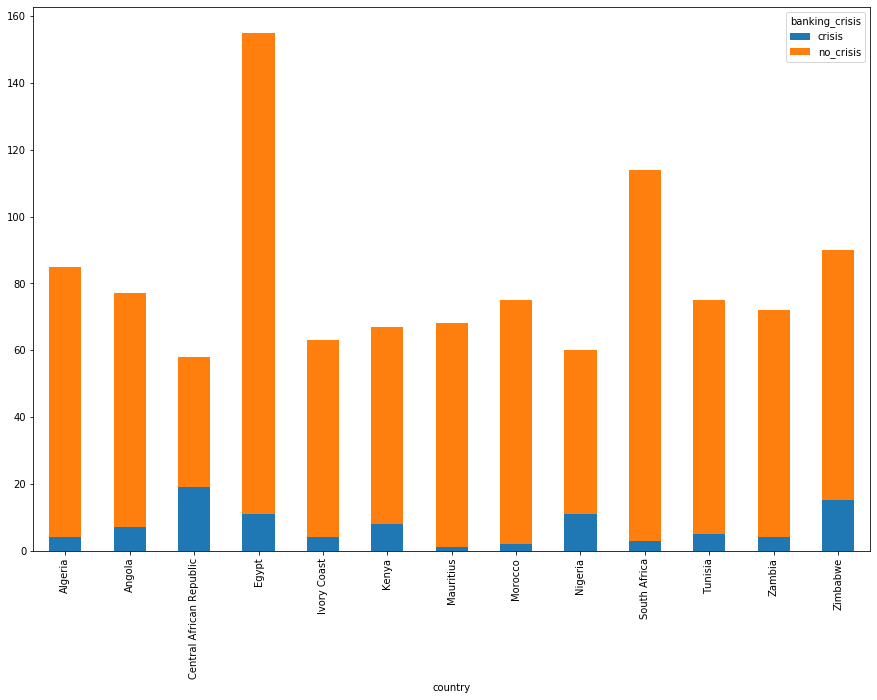

In [25]:
by_country = africa.groupby(['country', 'banking_crisis'])['country'].count().unstack('banking_crisis').fillna(0)
by_country[['crisis', 'no_crisis']].plot(kind='bar', stacked=True, figsize=(15, 10))
plt.show()

In [26]:
#

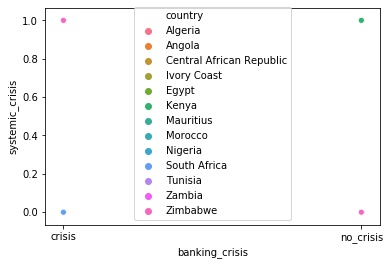

In [36]:
sns.scatterplot(x='banking_crisis', y='systemic_crisis', hue='country', data=africa)

Text(0, 0.5, 'systemic crises')

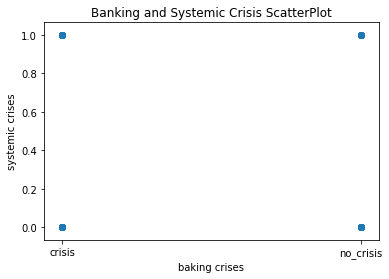

In [34]:
fig, ax =plt.subplots()
ax.scatter(africa['banking_crisis'], africa['systemic_crisis'])
ax.set_title('Banking and Systemic Crisis ScatterPlot')
ax.set_xlabel('baking crises')
ax.set_ylabel('systemic crises')

In [32]:
egypt = africa.groupby('country').get_group('Egypt')

In [33]:
egypt.head(10)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
283,19,EGY,Egypt,1860,0,0.206612,0,0,0.0,5.944478,1,0,0,no_crisis
284,19,EGY,Egypt,1861,0,0.206612,0,0,0.0,5.952720,1,0,0,no_crisis
285,19,EGY,Egypt,1862,0,0.206612,0,0,0.0,5.940860,1,0,0,no_crisis
286,19,EGY,Egypt,1863,0,0.206612,0,0,0.0,5.950266,1,0,0,no_crisis
287,19,EGY,Egypt,1864,0,0.206612,0,0,0.0,5.951383,1,0,0,no_crisis
288,19,EGY,Egypt,1865,0,0.206612,0,0,0.0,5.944846,1,0,0,no_crisis
289,19,EGY,Egypt,1866,0,0.206612,0,0,0.0,5.941967,1,0,0,no_crisis
290,19,EGY,Egypt,1867,0,0.206612,0,0,0.0,5.951062,1,0,0,no_crisis
291,19,EGY,Egypt,1868,0,0.206612,0,0,0.0,5.949439,1,0,0,no_crisis
292,19,EGY,Egypt,1869,0,0.196700,0,0,0.0,5.938285,1,0,0,no_crisis


In [29]:
egypt.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [30]:
egypt[egypt['currency_crises'] == 1]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
372,19,EGY,Egypt,1949,0,0.34840,0,0,0.0,0.000000,1,1,0,no_crisis
385,19,EGY,Egypt,1962,0,0.43480,0,0,0.0,-4.203776,1,1,0,no_crisis
402,19,EGY,Egypt,1979,0,0.70000,0,0,0.0,9.902792,1,1,0,no_crisis
412,19,EGY,Egypt,1989,0,1.10000,0,0,0.0,20.129000,1,1,1,no_crisis
413,19,EGY,Egypt,1990,0,2.00000,0,0,0.0,21.219000,1,1,1,crisis
414,19,EGY,Egypt,1991,0,3.33221,0,0,0.0,14.737000,1,1,0,crisis
424,19,EGY,Egypt,2001,0,4.49000,0,0,0.0,2.431000,1,1,0,no_crisis
426,19,EGY,Egypt,2003,0,6.15320,0,0,0.0,0.000000,1,1,0,no_crisis


In [31]:
for col in africa.columns:
    print('----------------')
    print(africa[col].describe())

----------------
count    1059.000000
mean       35.613787
std        23.692402
min         1.000000
25%        15.000000
50%        38.000000
75%        56.000000
max        70.000000
Name: case, dtype: float64
----------------
count     1059
unique      13
top        EGY
freq       155
Name: cc3, dtype: object
----------------
count      1059
unique       13
top       Egypt
freq        155
Name: country, dtype: object
----------------
count    1059.000000
mean     1967.767705
std        33.530632
min      1860.000000
25%      1951.000000
50%      1973.000000
75%      1994.000000
max      2014.000000
Name: year, dtype: float64
----------------
count    1059.000000
mean        0.077432
std         0.267401
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: systemic_crisis, dtype: float64
----------------
count    1059.000000
mean       43.140831
std       111.475380
min         0.000000
25%         0.195350
50%         0.86840